In [43]:
%pwd 
%cd yolov5/
!pip install -r requirements.txt

C:\Users\AI\Auto_Farming\yolov5


In [36]:
import os
import glob
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

exp_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/"
path = 'C:/Users/AI/Auto_Farming/yolov5/'
weight = 'C:/Users/AI/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt'
source = 'C:/Users\AI/Auto_Farming/image/capture.png' 
save_img = 'C:/Users\AI/Auto_Farming/image/capture.png'
coordinate_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/labels/"
frame_img_path = "C:/Users/AI/Auto_Farming/image/capture.png"

In [51]:
cap = cv2.VideoCapture(1)
while True :
    try:
        os.unlink(exp_path+"labels/capture.txt")
    except:
        with open("C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/labels/capture.txt", 'w') as f:
            f.write('')
    ret, frame = cap.read()
    if not ret:
        break 
    resize_frame = resize_frame[:,:480]
    key = cv2.waitKey(99)
    cv2.imshow("test", resize_frame)
    cv2.imwrite(save_img, resize_frame,
               params=[cv2.IMWRITE_PNG_COMPRESSION, 0])
    !python {path}detect3.py --weight {weight} --img 640 --source {source} --save-txt --exist-ok --hide-conf --hide-labels
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break 
cap.release()
cv2.destroyAllWindows()


detect3: weights=['C:/Users/AI/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt'], source=C:/Users\AI/Auto_Farming/image/capture.png, data=data\coco128.yaml, imgsz=[1088, 1088], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5  v6.2-219-ga83d2a5 Python-3.9.12 torch-1.12.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\AI\Auto_Farming\image\capture.png: 1088x1088 6 Ginsengs, 7 heads, 593.4ms
Speed: 4.0ms pre-process, 593.4ms inference, 11.0ms NMS per image at shape (1, 3, 1088, 1088)
Results saved to runs\detect\exp
225 labels saved to runs\detect\exp\labels
detect3: weights=['C:/Users/AI/Auto_Far

detect3: weights=['C:/Users/AI/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt'], source=C:/Users\AI/Auto_Farming/image/capture.png, data=data\coco128.yaml, imgsz=[1088, 1088], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5  v6.2-219-ga83d2a5 Python-3.9.12 torch-1.12.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\AI\Auto_Farming\image\capture.png: 1088x1088 10 Ginsengs, 10 heads, 595.4ms
Speed: 4.0ms pre-process, 595.4ms inference, 1.0ms NMS per image at shape (1, 3, 1088, 1088)
Results saved to runs\detect\exp
225 labels saved to runs\detect\exp\labels
detect3: weights=['C:/Users/AI/Auto_Far

In [33]:
exp_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/"
path = 'C:/Users/AI/Auto_Farming/yolov5/'
weight = 'C:/Users/AI/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt'
source = 'C:/Users\AI/Auto_Farming/image/capture.png' 
rs = !python {path}detect3.py --weight {weight} --source {source} --save-txt --exist-ok --hide-conf --hide-labels

In [37]:
import os
import sys
import glob
from pathlib import Path
import math
import numpy as np


# FILE = Path(__file__).resolve()
# ROOT = FILE.parents[0]/'runs/detect/exp/'


gc, hc, ga, da = [], [], [], []
min_gl, a = float('inf'), 0

with open(coordinate_path+"capture.txt", "r") as f:
    txt = f.readlines()  

[gc.append(i) if i[0] == '0' else hc.append(i) for i in txt]

gn, hn, p = len(gc), len(hc), 0

for i in range(gn):
    g = gc[i][2:-1].split(' ')
    gltx, glty, grbx, grby = int(g[0]), int(g[1]), int(g[2]), int(g[3])
    lt, rt, lb, rb = [gltx, glty], [grbx, glty], [gltx, grby], [grbx, grby]
    globals()["g{}".format(i)] = [lt, rt, lb, rb]

    for j in range(hn):
        h = hc[j][2:-1].split(' ')
        hltx, hlty, hrbx, hrby = int(h[0]), int(h[1]), int(h[2]), int(h[3])
        globals()["h{}".format(j)] = [int((hltx+hrbx)/2), int((hlty+hrby)/2)]
        if (globals()[f"g{i}"][3][0] > globals()[f"h{j}"][0] > globals()[f"g{i}"][0][0])\
        and (globals()[f"g{i}"][3][1] > globals()[f"h{j}"][1] > globals()[f"g{i}"][0][1]):
            globals()["g{}".format(i)].append(globals()["h{}".format(j)])

    ga.append(globals()["g{}".format(i)])

for i in ga:
    if len(i) == 5:
        da.append(i)
        
# da=(1,2,3,4) # 개체수 없는 시나리오


if len(da) <= 5:
    p = 1
else: 
    for v in da:
        if min_gl > v[0][0]:
                min_gl = v[0][0]   
    for i,value in enumerate(da):
        if min_gl == value[0][0]:
            globals()["g{}".format(i)] = np.array(globals()["g{}".format(i)])
            best = globals()["g{}".format(i)]
            alt = abs(globals()["g{}".format(i)][0]-globals()["g{}".format(i)][-1])
            art = abs(globals()["g{}".format(i)][1]-globals()["g{}".format(i)][-1])
            alb = abs(globals()["g{}".format(i)][2]-globals()["g{}".format(i)][-1])
            arb = abs(globals()["g{}".format(i)][3]-globals()["g{}".format(i)][-1])
            altu, artu = int(math.sqrt((alt[0]**2)+(alt[1]**2))), int(math.sqrt((art[0]**2)+(art[1]**2)))
            albu, arbu = int(math.sqrt((alb[0]**2)+(alb[1]**2))), int(math.sqrt((arb[0]**2)+(arb[1]**2)))
            bgc = {'LT':altu, 'RT':artu, 'LB':albu, 'RB':arbu}
            bgc_sorted=sorted(bgc.items(), key=lambda x:x[1])
            if bgc_sorted[1][1] - bgc_sorted[0][1] < 20:
                if bgc_sorted[0][0] == 'RT' and bgc_sorted[1][0] == 'RB':
                    a=0
                elif bgc_sorted[1][0] == 'RT' and bgc_sorted[0][0] == 'RB':
                    a=0
                elif bgc_sorted[0][0] == 'LT'and bgc_sorted[1][0] == 'RT': 
                    a=90
                elif bgc_sorted[1][0] == 'LT'and bgc_sorted[0][0] == 'RT':
                    a=90
                elif bgc_sorted[0][0] == 'LT' and bgc_sorted[1][0] == 'LB':
                    a=180
                elif bgc_sorted[1][0] == 'LT' and bgc_sorted[0][0] == 'LB':
                    a=180
                elif bgc_sorted[0][0] == 'LB' and bgc_sorted[1][0] == 'RB': 
                    a=270
                elif bgc_sorted[1][0] == 'LB' and bgc_sorted[0][0] == 'RB':
                    a=270
            else:
                if bgc_sorted[0][0] == 'RT':
                    a=45
                elif bgc_sorted[0][0] == 'LT':
                    a=135
                elif bgc_sorted[0][0] == 'LB': 
                    a=225
                elif bgc_sorted[0][0] == 'RB':
                    a=315

print(f'정상 검출 갯수 : {len(da)}')
print('피더 작동') if p==1 else print('피더 작동 안함')
print(f'그리퍼 각도 : {a}')
print(f'좌표 : {best[-1][0]}, {best[-1][1]}')



정상 검출 갯수 : 9
피더 작동 안함
그리퍼 각도 : 0
좌표 : 517, 311


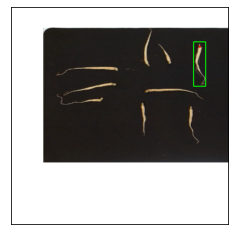

In [38]:
best=g6

frame_img = cv2.imread(frame_img_path, cv2.IMREAD_COLOR)
frame_img = cv2.cvtColor(frame_img, cv2.COLOR_BGR2RGB)
frame_img = cv2.rectangle(frame_img, (best[0][0], best[0][1]), (best[3][0], best[3][1]),(0,255,0), 3)
frame_img = cv2.circle(frame_img, (best[-1][0],best[-1][1]),5,(255,0,0), -1)
plt.xticks([]); plt.yticks([])
plt.imshow(frame_img)

In [27]:
import math
import numpy as np
from pathlib import Path
thisLOC = Path(__file__).resolve()
exp_path = str(thisLOC.parents[0]/'runs/detect/exp/')

NameError: name '__file__' is not defined

In [28]:


exp_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/"  # 임시 경로

def Another():
    with open(exp_path+"fiststage.txt", "r") as f:
        txt = f.readlines()  

    GinseongCoordinate, HeadCoordinate, GinseongAllList, DetactedAllList, best = [], [], [], [], []
    NearestGinseong, angle, conveyer, feeder = float('inf'), 0, 0, 0

    [GinseongCoordinate.append(i) if i[0] == '0' else HeadCoordinate.append(i) for i in txt]
    Gamount, Hamount = len(GinseongCoordinate), len(HeadCoordinate)


    for i in range(Gamount):
        g = GinseongCoordinate[i][2:-1].split(' ')
        gltx, glty, grbx, grby = int(g[0]), int(g[1]), int(g[2]), int(g[3])
        lt, rt, lb, rb = [gltx, glty], [grbx, glty], [gltx, grby], [grbx, grby]
        globals()["g{}".format(i)] = [lt, rt, lb, rb]
        globals()["g{}".format(i)] = np.array(globals()["g{}".format(i)])

        for j in range(Hamount):
            h = HeadCoordinate[j][2:-1].split(' ')
            hltx, hlty, hrbx, hrby = int(h[0]), int(h[1]), int(h[2]), int(h[3])
            globals()["h{}".format(j)] = [int((hltx+hrbx)/2), int((hlty+hrby)/2)]
            globals()["h{}".format(j)] = np.array(globals()["h{}".format(j)])
            if (globals()[f"g{i}"][3][0] > globals()[f"h{j}"][0] > globals()[f"g{i}"][0][0])\
            and (globals()[f"g{i}"][3][1] > globals()[f"h{j}"][1] > globals()[f"g{i}"][0][1]):
                globals()["g{}".format(i)].append(globals()["h{}".format(j)])

        GinseongAllList.append(globals()["g{}".format(i)])


    if len(GinseongAllList) < 4:
        conveyer = 1 
    else: 
        for i in GinseongAllList:
            if len(i) == 5:
                DetactedAllList.append(i)

        if len(DetactedAllList) <= 3:
            feeder = 1
        else: 
            for k in DetactedAllList:
                if NearestGinseong > k[0][0]:
                        NearestGinseong = k[0][0]   
            for i,value in enumerate(DetactedAllList):
                if NearestGinseong == value[0][0]:
                    best = globals()["g{}".format(i)]
                    alt = abs(globals()["g{}".format(i)][0]-globals()["g{}".format(i)][-1])
                    art = abs(globals()["g{}".format(i)][1]-globals()["g{}".format(i)][-1])
                    alb = abs(globals()["g{}".format(i)][2]-globals()["g{}".format(i)][-1])
                    arb = abs(globals()["g{}".format(i)][3]-globals()["g{}".format(i)][-1])
                    altu, artu = int(math.sqrt((alt[0]**2)+(alt[1]**2))), int(math.sqrt((art[0]**2)+(art[1]**2)))
                    albu, arbu = int(math.sqrt((alb[0]**2)+(alb[1]**2))), int(math.sqrt((arb[0]**2)+(arb[1]**2)))
                    bgc = {'LT':altu, 'RT':artu, 'LB':albu, 'RB':arbu}
                    bgc_sorted=sorted(bgc.items(), key=lambda x:x[1])
                    if bgc_sorted[1][1] - bgc_sorted[0][1] < 20:
                        if bgc_sorted[0][0] == 'RT' and bgc_sorted[1][0] == 'RB':
                            angle=0
                        elif bgc_sorted[1][0] == 'RT' and bgc_sorted[0][0] == 'RB':
                            angle=0
                        elif bgc_sorted[0][0] == 'LT'and bgc_sorted[1][0] == 'RT': 
                            angle=90
                        elif bgc_sorted[1][0] == 'LT'and bgc_sorted[0][0] == 'RT':
                            angle=90
                        elif bgc_sorted[0][0] == 'LT' and bgc_sorted[1][0] == 'LB':
                            angle=180
                        elif bgc_sorted[1][0] == 'LT' and bgc_sorted[0][0] == 'LB':
                            angle=180
                        elif bgc_sorted[0][0] == 'LB' and bgc_sorted[1][0] == 'RB': 
                            angle=270
                        elif bgc_sorted[1][0] == 'LB' and bgc_sorted[0][0] == 'RB':
                            angle=270
                    else:
                        if bgc_sorted[0][0] == 'RT':
                            angle=45
                        elif bgc_sorted[0][0] == 'LT':
                            angle=135
                        elif bgc_sorted[0][0] == 'LB': 
                            angle=225
                        elif bgc_sorted[0][0] == 'RB':
                            angle=315
                    x_coordinate = best[-1][0]
                    y_coordinate = best[-1][1]
                else:
                    best = []
            feeder = 0
            conveyer = 0

    print(f'인삼 검출 갯수 : {len(GinseongAllList)}')
    print(f'컨베이어 작동') if conveyer == 1 else print('컨베이어 작동 안함')
    print(f'정상 검출 갯수 : {len(DetactedAllList)}')
    print('피더 작동') if pither == 1 else print('피더 작동 안함')
    print(f'그리퍼 각도 : {angle}')
    try:
        print(f'좌표 : {x_coordinate}, {y_coordinate}')
    except:
        print('Best pick does not exist!')

    if best:  
        # with open(exp_path+"result.txt", 'w') as f:
        #     f.write(f'{conveyer} {feeder} {angle} {x_coordinate} {y_coordinate}')
        return conveyer, feeder, angle, x_coordinate, y_coordinate
    else:
        pass


In [29]:
Another()

인삼 검출 갯수 : 0
컨베이어 작동
정상 검출 갯수 : 0
피더 작동 안함
그리퍼 각도 : 0
Best pick does not exist!
